# **1. Health Expectation**

In [3]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


## *1. Déterminez quelles sont les variables Discrètes et Continues du dataset.*

   - Les variables **discrètes** sont les suivantes :
      - Year
      - Country

   - Les variables **continues** sont les suivantes :
      - Spending_USD
      - Life_Expectancy


## *2. Analyser la variable "Country"*

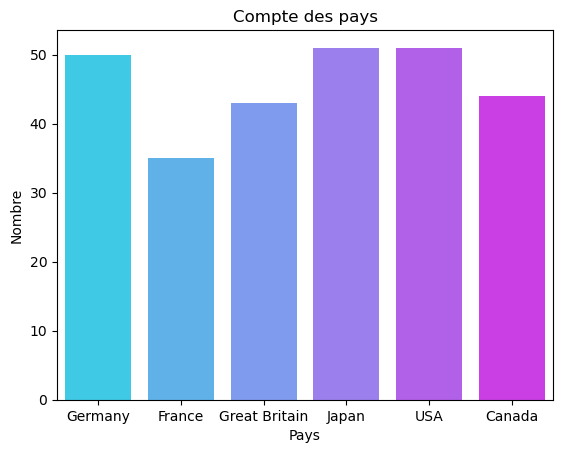

In [22]:
### Pandas ####
# df.value_counts('Country').plot(kind='bar')

### Seaborn ###
sorted_order = df['Country'].value_counts().index

sns.countplot(x='Country', hue='Country', data=df, palette='cool')
plt.title("Compte des pays")
plt.xlabel("Pays")
plt.ylabel("Nombre")
plt.show()

## *3. Analyser la variable "Spending_USD"*

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

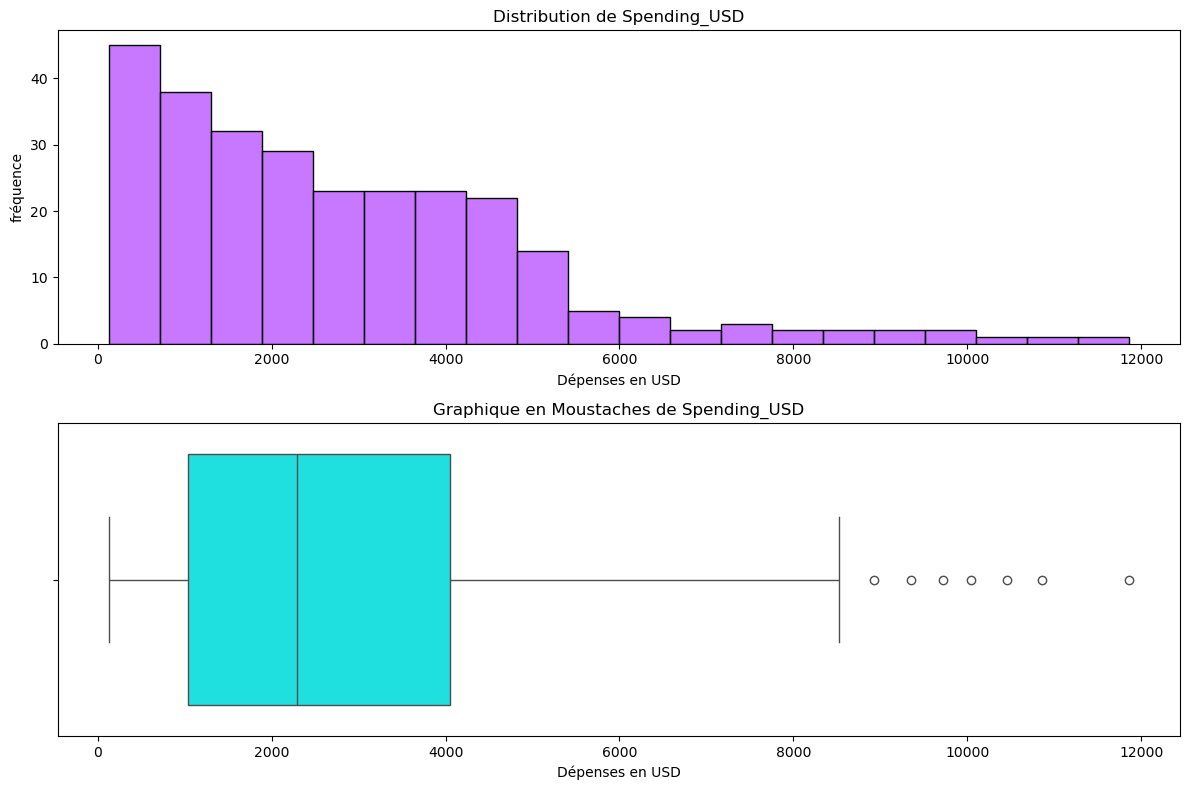

In [25]:
description = df["Spending_USD"].describe()
display(description)

# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

sns.histplot(df['Spending_USD'], ax=ax1, bins=20, color='#B649FF')
ax1.set_title("Distribution de Spending_USD")
ax1.set_xlabel("Dépenses en USD")
ax1.set_ylabel("fréquence")


sns.boxplot(x=df['Spending_USD'], color='cyan')
ax2.set_title("Graphique en Moustaches de Spending_USD")
ax2.set_xlabel("Dépenses en USD")

plt.tight_layout()
plt.show()

## *4. Analyser la variable "Life_Expectancy"*

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

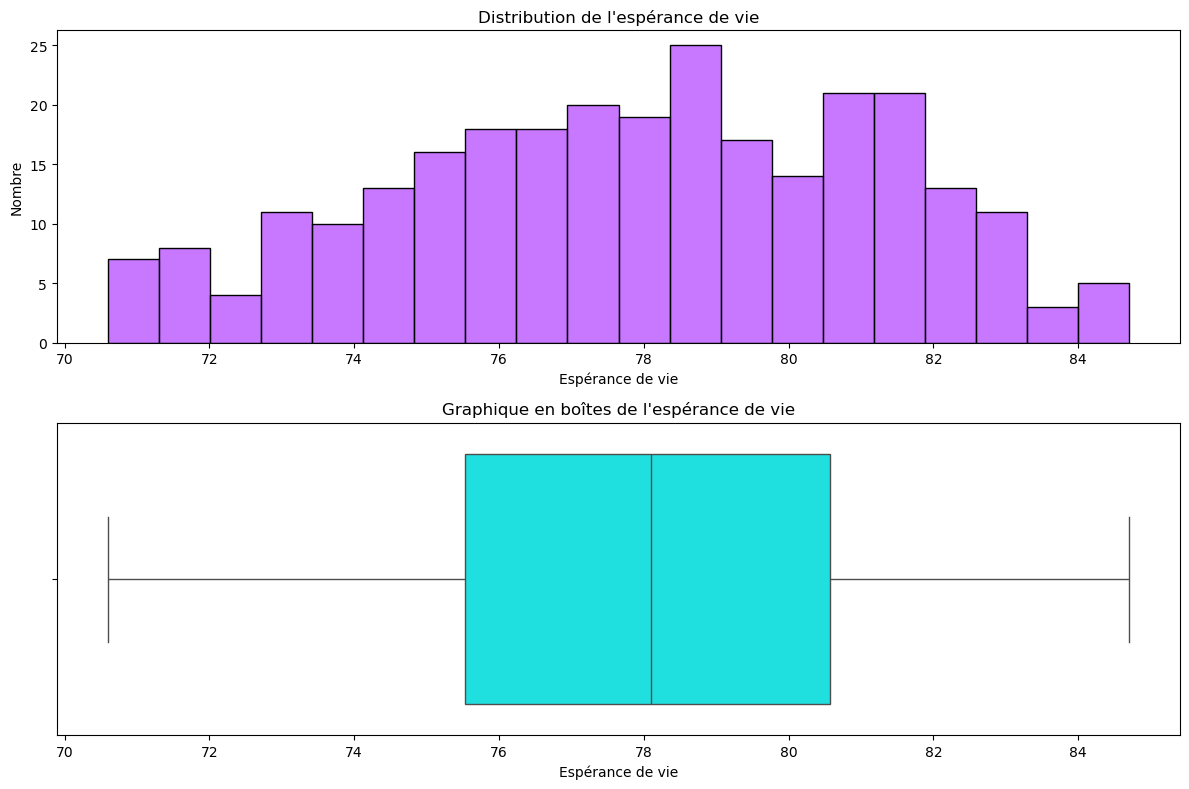

In [19]:
description = df["Life_Expectancy"].describe()
display(description)

# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))


sns.histplot(df['Life_Expectancy'], ax=ax1, bins=20, color='#B649FF')
ax1.set_title("Distribution de l'espérance de vie")
ax1.set_xlabel("Espérance de vie")
ax1.set_ylabel("Nombre")


sns.boxplot(x=df['Life_Expectancy'], color='cyan')
ax2.set_title("Graphique en boîtes de l'espérance de vie")
ax2.set_xlabel("Espérance de vie")

plt.tight_layout()
plt.show()

## *5/6. Observez l'évolution de la durée de vie à travers le temps.*

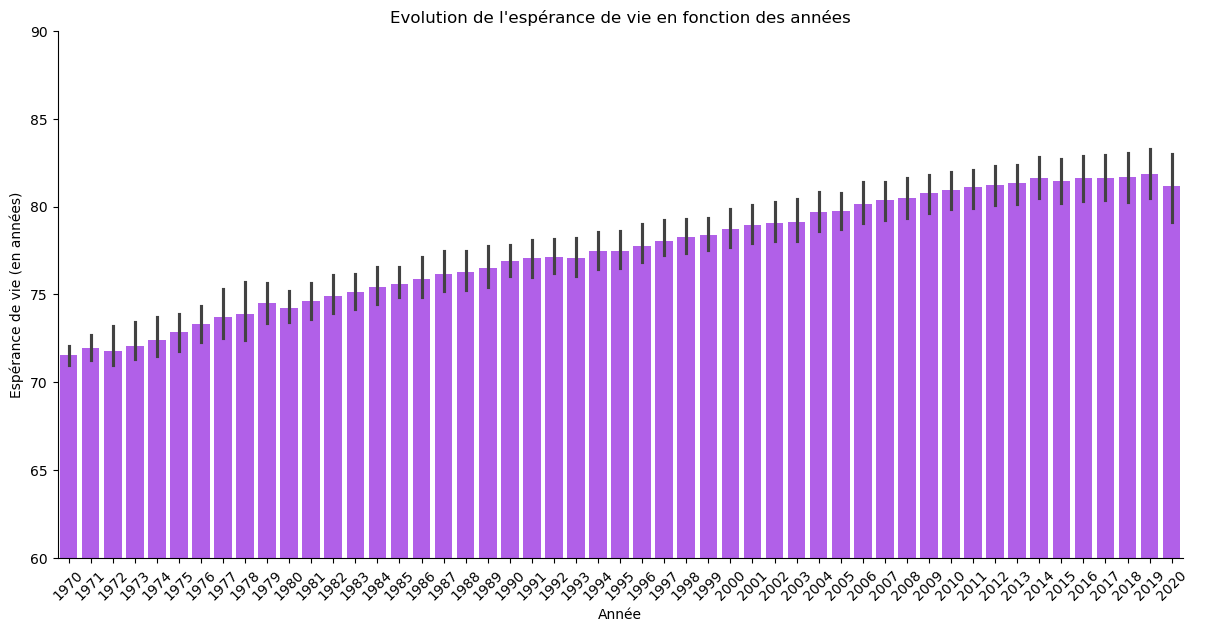

In [17]:
### Pandas ###
# df.groupby('Year')['Life_Expectancy'].mean().plot(kind='bar')

### Seaborn ###
g = sns.catplot(x='Year', y='Life_Expectancy', data=df, kind='bar', height=6, aspect=2, color='#B649FF')
g.set(ylim=(60, 90))
g.set_xticklabels(rotation=45)

plt.title("Evolution de l'espérance de vie en fonction des années")
plt.xlabel("Année")
plt.ylabel("Espérance de vie (en années)")
plt.show()

## *7. Observez l'évolution des dépenses en santé de l'Allemagne et de la Grande Bretagne à travers le temps.*

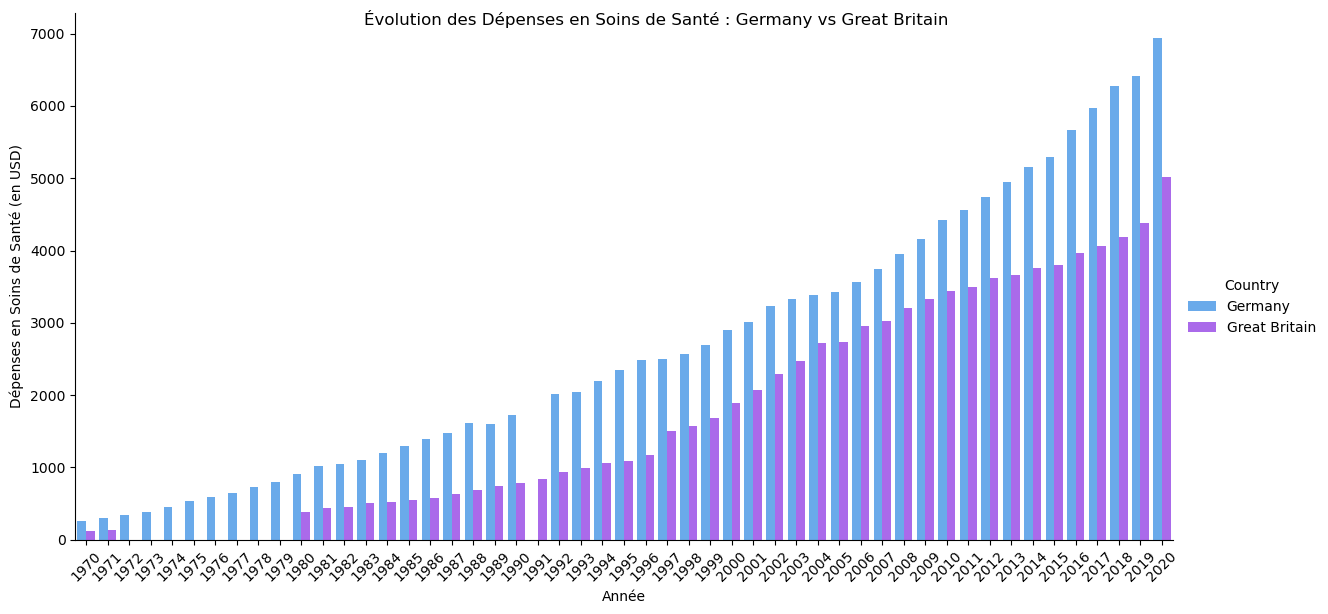

In [16]:
df_filtered = df[df['Country'].isin(['Germany', 'Great Britain'])]

g = sns.catplot(
    x='Year', y='Spending_USD', hue='Country', data=df_filtered, 
    kind='bar', height=6, aspect=2, palette='cool'
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("Année", "Dépenses en Soins de Santé (en USD)")
g.figure.suptitle("Évolution des Dépenses en Soins de Santé : Germany vs Great Britain")
plt.show()

## *8. Observez l'histograme, la boxplot, et les statistiques de "Life_Expectancy" propre à chaque pays.*

               count       mean       std   min     25%   50%     75%   max
Country                                                                    
Canada          44.0  78.706818  2.502222  72.8  76.775  78.7  80.975  82.2
France          35.0  79.565714  2.862120  72.2  78.050  79.4  82.200  82.9
Germany         50.0  76.726000  3.473915  70.6  73.575  77.1  80.175  81.3
Great Britain   43.0  77.620930  2.827548  71.9  75.350  77.5  80.400  81.4
Japan           51.0  79.554902  3.547242  72.0  76.950  79.8  82.650  84.7
USA             51.0  75.843137  2.336258  70.9  74.550  75.7  77.950  78.9


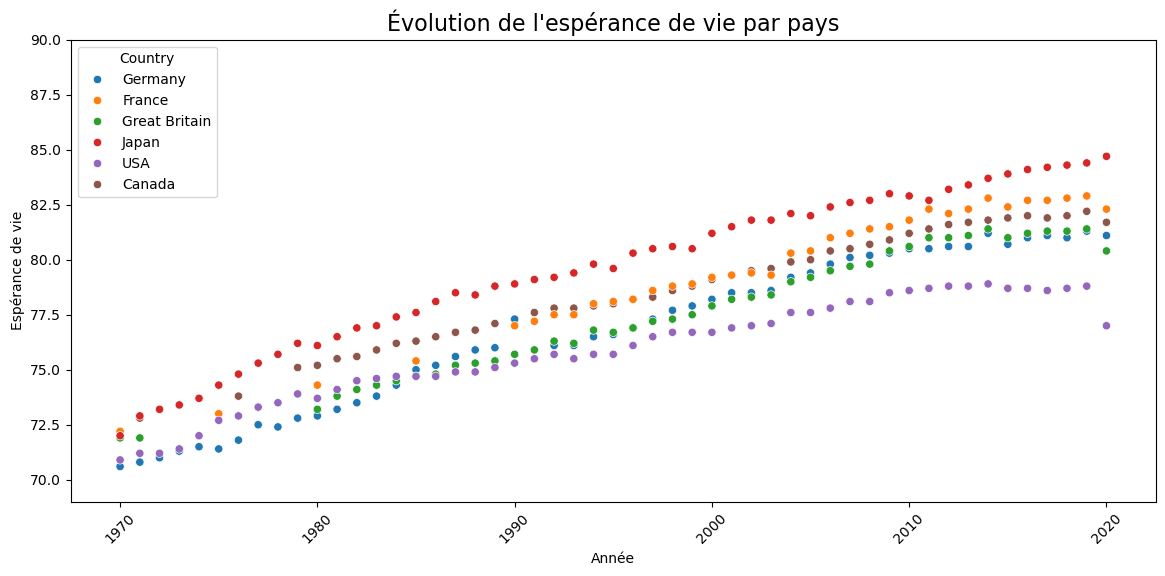

In [24]:
description = df.groupby('Country')['Life_Expectancy'].describe()
print(description)

plt.figure(figsize=(14, 6))  
sns.scatterplot(x='Year', y='Life_Expectancy', hue='Country', data=df)

plt.xticks(rotation=45)
plt.ylim(69, 90)

plt.title("Évolution de l'espérance de vie par pays", fontsize=16)
plt.xlabel("Année")
plt.ylabel("Espérance de vie")
plt.show()

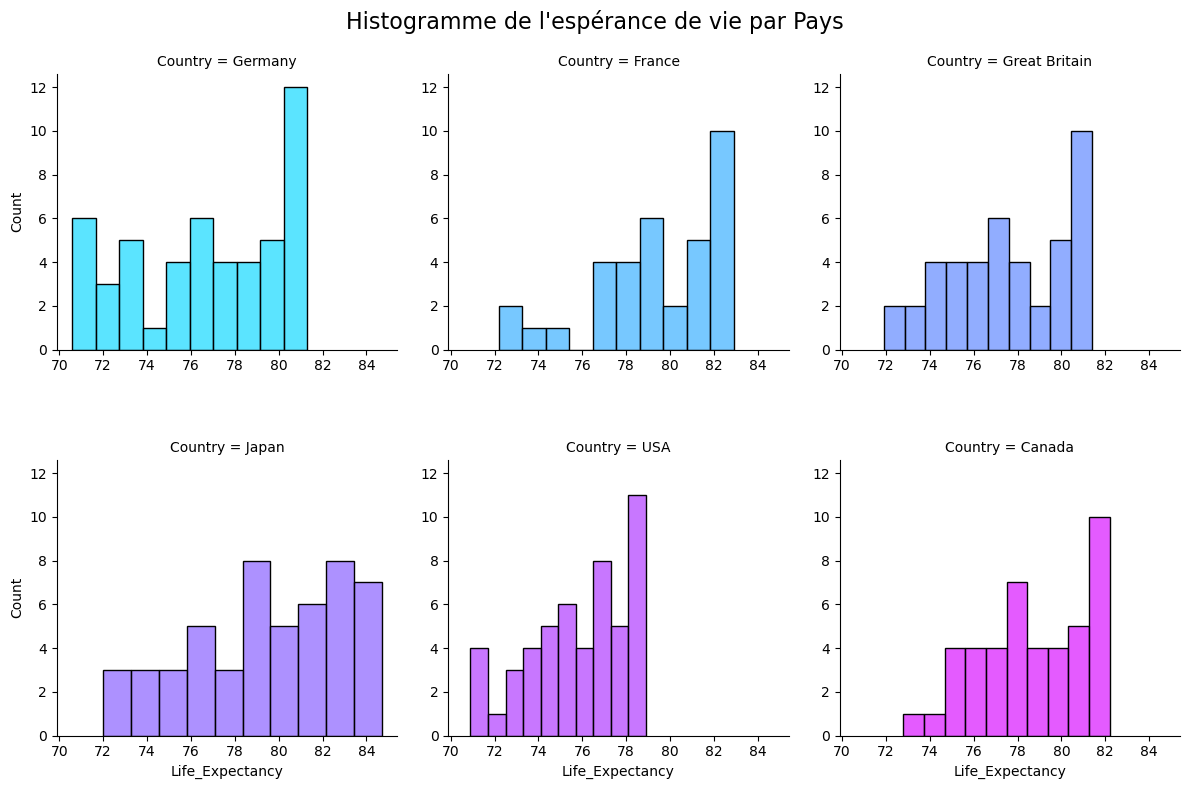

In [11]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=4, sharex=True, sharey=True, hue='Country', palette='cool')
g.map(sns.histplot, 'Life_Expectancy', bins=10)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelbottom=True)
    ax.tick_params(axis='y', labelleft=True)

plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.15)
plt.suptitle("Histogramme de l'espérance de vie par Pays", fontsize=16)
plt.show()

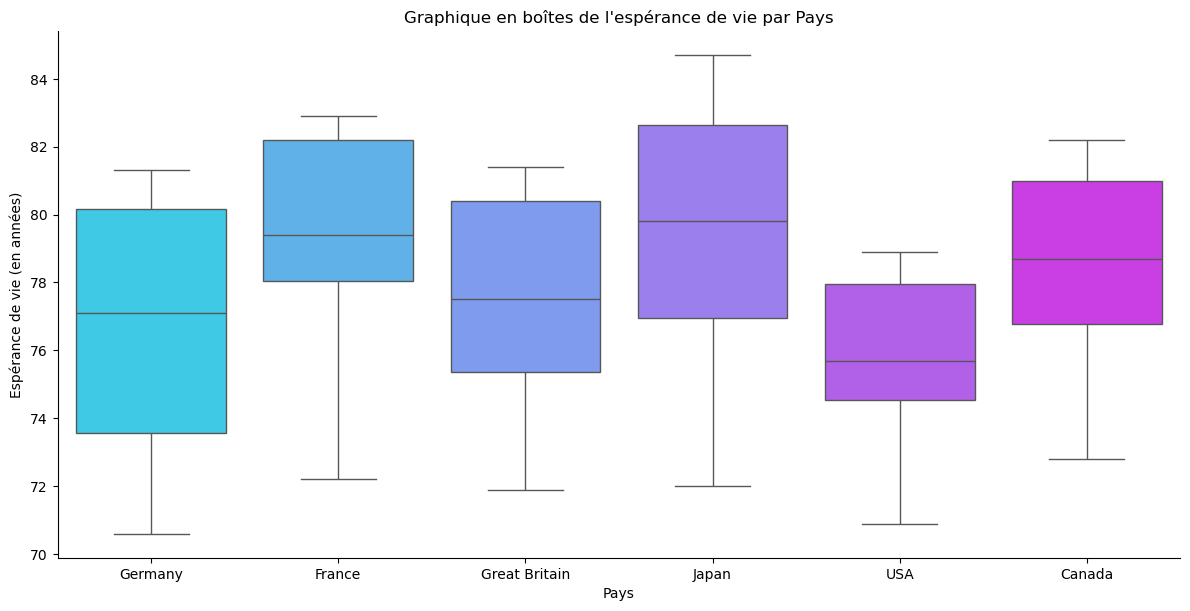

In [12]:
sns.catplot(
    x='Country', y='Life_Expectancy', data=df, kind='box', hue='Country',
    height=6, aspect=2, palette='cool'
)
plt.title("Graphique en boîtes de l'espérance de vie par Pays")
plt.xlabel("Pays")
plt.ylabel("Espérance de vie (en années)")
plt.show()

## *9. Observez la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000 à 2020.*

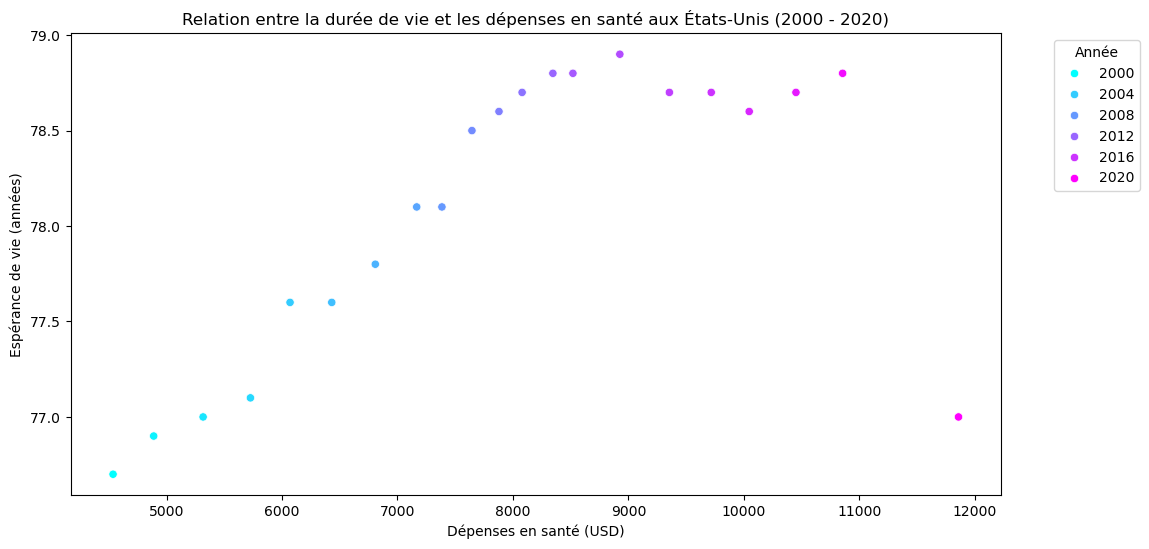

In [13]:
df_usa = df[(df['Country'] == 'USA') & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x='Spending_USD', y='Life_Expectancy', hue='Year', data=df_usa, palette='cool'
)

plt.title("Relation entre la durée de vie et les dépenses en santé aux États-Unis (2000 - 2020)")
plt.xlabel("Dépenses en santé (USD)")
plt.ylabel("Espérance de vie (années)")
plt.legend(title="Année", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## *10. Il y a une valeur abérante tant tout cela. Laquelle? Pourquoi?*

La toute dernière valeur de 2020 est aberrante parce qu'elle montre une baisse assez importante de l'espérance de vie qui semble complètement erratique par rapport à la tendance jusque là, d'autant qu'il s'agit également de la plus grosse dépense.


### Observations générales:
- L'espérance de vie augmente au fil du temps jsuqu'en 2020 où le seul pays qui a continué à augmenter c'est le Japon. 
- L'allemagne augmente ses dépenses en soins de santé de manière exponentiel, alors que les UK, c'est moins le cas.
- Aux Etats-Unis nous semblons voir une stagnation de l'espérance de vie par rapport aux dépense et ce malrgé l'augmentation de celles-ci, trop de burgers ça surement. 